# 08. 고급 시각화 - 실습 문제

## 실습 안내
- 총 8개 문제 (총 100점)
- Subplot, 이중 축, 시계열 시각화 연습
- 복합 차트와 고급 커스터마이징

## 환경 설정 및 데이터 로드

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
# import warnings
# warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
production_df = pd.read_csv('../data/05_production.csv', encoding='utf-8-sig')
sensor_df = pd.read_csv('../data/08_sensor_data.csv', encoding='utf-8-sig')

# 날짜 변환
production_df['production_date'] = pd.to_datetime(production_df['production_date'])
sensor_df['measurement_time'] = pd.to_datetime(sensor_df['measurement_time'])

# 불량률 계산
production_df['defect_rate'] = (
    production_df['defect_quantity'] / production_df['actual_quantity'] * 100
).round(2)

print("데이터 로드 완료!")

데이터 로드 완료!


---
## 문제 1: 2x2 Subplot - 제품 분석 대시보드 (15점)

**요구사항**:
2x2 subplot을 구성하여 제품 분석 대시보드 생성

1. **[0, 0]**: 제품별 총 생산량 막대 그래프
   - 색상: 'steelblue', 테두리: 'black'
   - 제목: '제품별 총 생산량'

2. **[0, 1]**: 제품별 평균 불량률 가로 막대 그래프
   - 색상: 'coral', 테두리: 'black'
   - 제목: '제품별 평균 불량률'

3. **[1, 0]**: 제품별 평균 사이클 타임 막대 그래프
   - 색상: 'lightgreen', 테두리: 'black'
   - 제목: '제품별 평균 사이클 타임'

4. **[1, 1]**: 제품별 생산 건수 막대 그래프
   - 색상: 'plum', 테두리: 'black'
   - 제목: '제품별 생산 건수'

5. Figure 크기: (14, 10)
6. 전체 제목: '제품 분석 대시보드'

**힌트**: `fig, axes = plt.subplots(2, 2)`, `axes[i, j]`

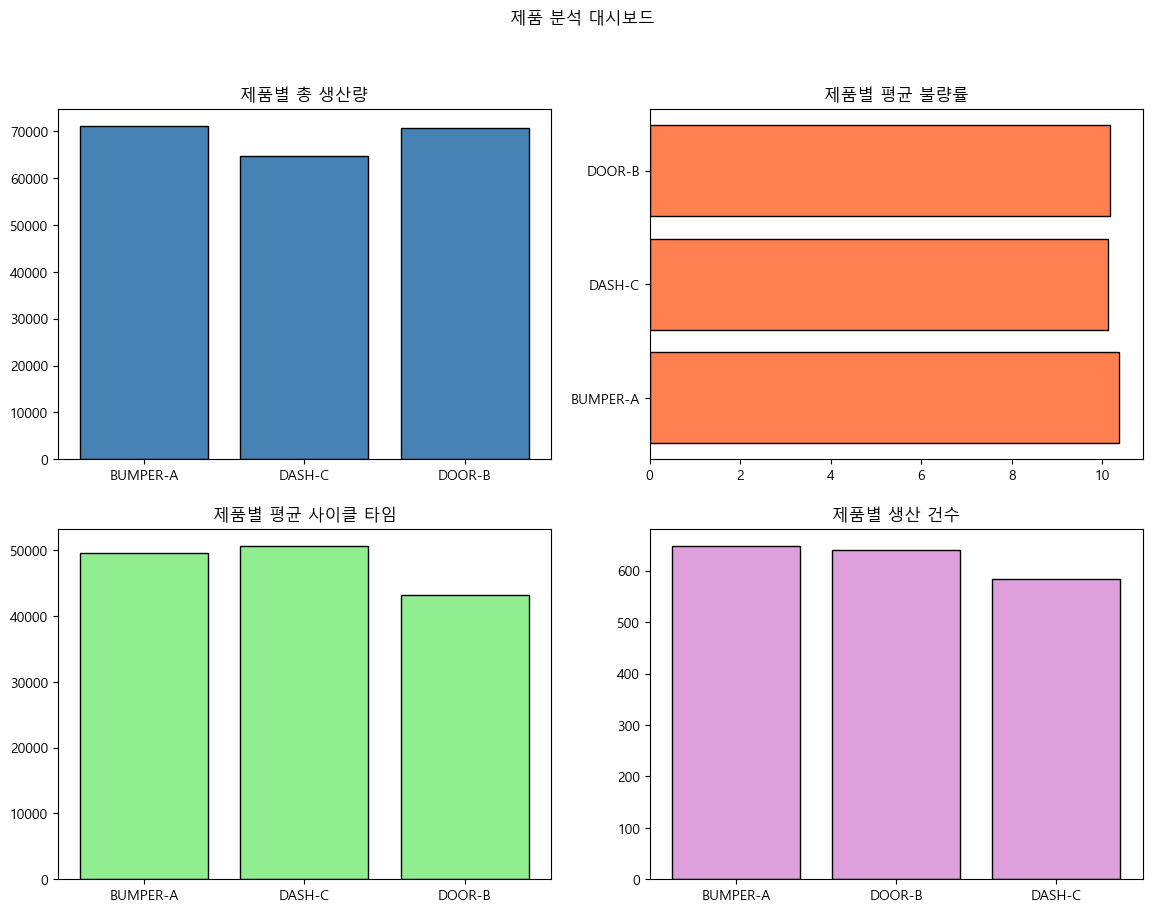

In [136]:
# 2x2 subplot을 구성하여 제품 분석 대시보드 생성
# 5. Figure 크기: (14, 10)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))


# 1. **[0, 0]**: 제품별 총 생산량 막대 그래프
#    - 색상: 'steelblue', 테두리: 'black'
#    - 제목: '제품별 총 생산량'
prod_qty = production_df.groupby('product_code')['actual_quantity'].sum()
axs[0, 0].bar(prod_qty.index, prod_qty.values,
              color='steelblue', edgecolor='black')
axs[0, 0].set_title('제품별 총 생산량')

# 2. **[0, 1]**: 제품별 평균 불량률 가로 막대 그래프
#    - 색상: 'coral', 테두리: 'black'
#    - 제목: '제품별 평균 불량률'
prod_dft_rate = production_df.groupby('product_code')['defect_rate'].mean()
axs[0, 1].barh(prod_dft_rate.index, prod_dft_rate.values,
              color='coral', edgecolor='black')
axs[0, 1].set_title('제품별 평균 불량률')

# 3. **[1, 0]**: 제품별 평균 사이클 타임 막대 그래프
#    - 색상: 'lightgreen', 테두리: 'black'
#    - 제목: '제품별 평균 사이클 타임'
prod_ct = production_df.groupby('product_code')['cycle_time'].sum()
axs[1, 0].bar(prod_ct.index, prod_ct.values,
              color='lightgreen', edgecolor='black')
axs[1, 0].set_title('제품별 평균 사이클 타임')

# 4. **[1, 1]**: 제품별 생산 건수 막대 그래프
#    - 색상: 'plum', 테두리: 'black'
#    - 제목: '제품별 생산 건수'
prod_cnt = production_df['product_code'].value_counts()
axs[1, 1].bar(prod_cnt.index, prod_cnt.values,
              color='plum', edgecolor='black')
axs[1, 1].set_title('제품별 생산 건수')

# 6. 전체 제목: '제품 분석 대시보드'
plt.suptitle('제품 분석 대시보드')

plt.show()

---
## 문제 2: 이중 y축 - 일별 생산량 vs 불량률 (15점)

**요구사항**:
1. 일별 총 생산량과 평균 불량률 집계 (처음 30일)
2. 이중 y축 차트 생성:
   - 왼쪽 축: 생산량 (선 그래프, 색상: 'steelblue', 마커: 'o')
   - 오른쪽 축: 불량률 (선 그래프, 색상: 'red', 마커: 's', 점선)
3. 각 축의 레이블 색상을 선 색상과 동일하게
4. 제목: '일별 생산량 vs 불량률 (30일)'
5. 범례 결합하여 표시
6. Figure 크기: (14, 6)

**힌트**: `ax1.twinx()`, `lines = line1 + line2`

In [137]:
# 1. 일별 총 생산량과 평균 불량률 집계 (처음 30일)
prod_30 = production_df.groupby('production_date').agg({'actual_quantity':'sum',
                                                        'defect_rate':'mean'}).round(2)
prod_30 = prod_30.iloc[:30, ]
prod_30

,actual_quantity,defect_rate
production_date,,
2024-01-01,2019,5.59
2024-01-02,2380,5.41
2024-01-03,1848,5.29
2024-01-04,2358,5.42
2024-01-05,2330,5.25
2024-01-06,2503,5.59
2024-01-07,2831,5.26
2024-01-08,2471,5.20
2024-01-09,2210,5.21


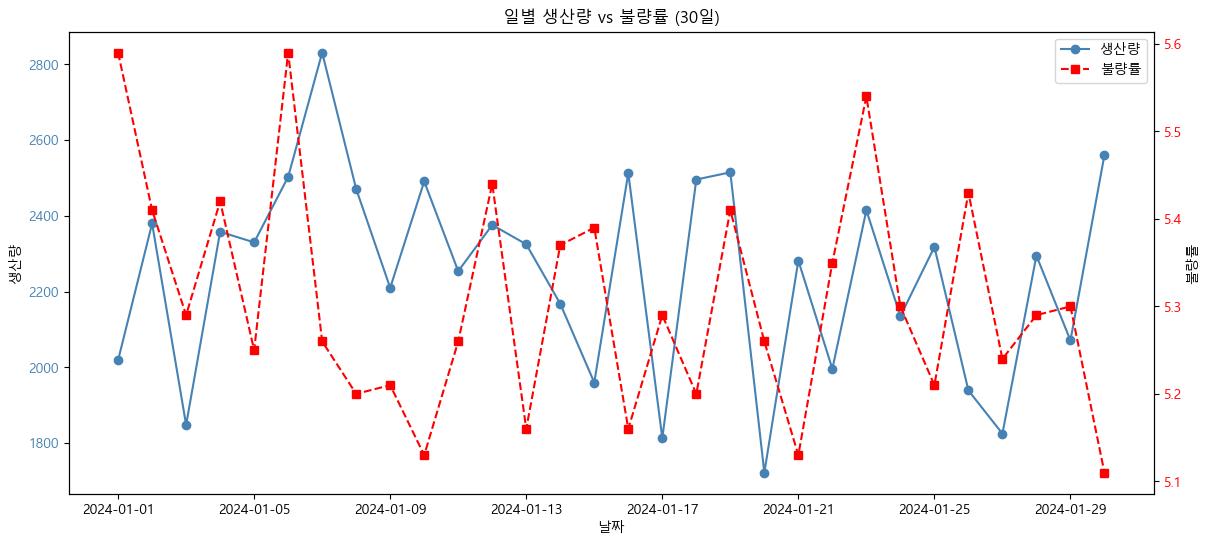

In [138]:
# 6. Figure 크기: (14, 6)
fig, ax1 = plt.subplots(figsize=(14, 6))

# 2. 이중 y축 차트 생성:
#    - 왼쪽 축: 생산량 (선 그래프, 색상: 'steelblue', 마커: 'o')
#    - 오른쪽 축: 불량률 (선 그래프, 색상: 'red', 마커: 's', 점선)
# 3. 각 축의 레이블 색상을 선 색상과 동일하게
ax1.plot(prod_30['actual_quantity'], label='생산량', color='steelblue', marker='o')
ax1.set_xlabel('날짜')
ax1.set_ylabel('생산량')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(prod_30['defect_rate'], label='불량률', color='red', marker='s', linestyle='--')
ax2.set_ylabel('불량률')
ax2.tick_params(axis='y', labelcolor='red')

# 4. 제목: '일별 생산량 vs 불량률 (30일)'
plt.title('일별 생산량 vs 불량률 (30일)')
# 5. 범례 결합하여 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2)

plt.show()

---
## 문제 3: 이중 축 + 막대 - 교대조별 생산량 vs 불량률 (15점)

**요구사항**:
1. 교대조별 총 생산량과 평균 불량률 집계
2. 이중 y축 차트:
   - 왼쪽 축: 생산량 (막대 그래프, 색상: 'skyblue', alpha=0.7)
   - 오른쪽 축: 불량률 (선 그래프, 색상: 'red', 마커: 'o', linewidth=2.5)
3. 제목: '교대조별 생산량 vs 불량률'
4. 각 축에 별도 범례
5. Figure 크기: (10, 6)

**힌트**: 막대는 ax1.bar(), 선은 ax2.plot()

In [139]:
# 1. 교대조별 총 생산량과 평균 불량률 집계
shift_summary = production_df.groupby('shift').agg({'actual_quantity':'sum',
                                                   'defect_rate':'mean'}).round(2)
shift_summary

,actual_quantity,defect_rate
shift,,
DAY,102690,8.82
NIGHT,103914,11.63


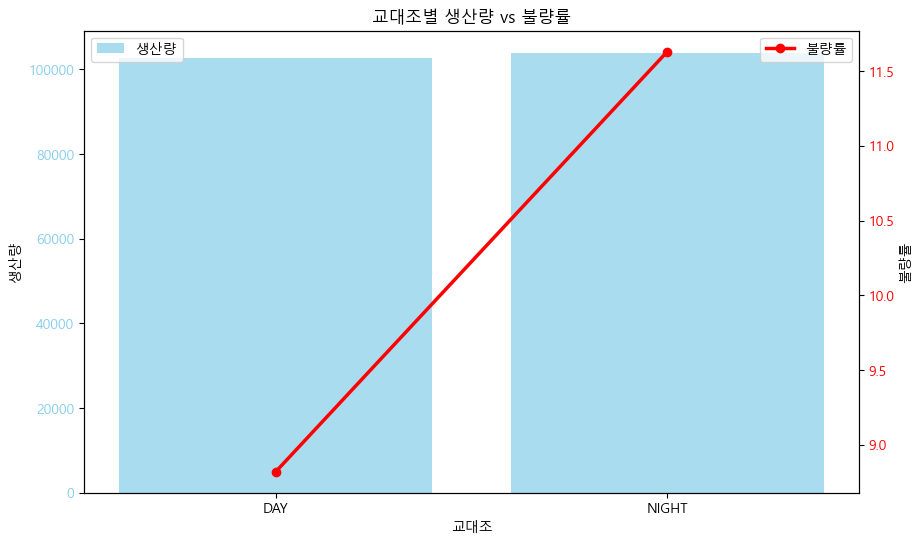

In [140]:
# 5. Figure 크기: (10, 6)
fig, ax1 = plt.subplots(figsize=(10, 6))

# 2. 이중 y축 차트:
#    - 왼쪽 축: 생산량 (막대 그래프, 색상: 'skyblue', alpha=0.7)
#    - 오른쪽 축: 불량률 (선 그래프, 색상: 'red', 마커: 'o', linewidth=2.5)
ax1.bar(shift_summary.index, shift_summary['actual_quantity'], label='생산량', color='skyblue', alpha=0.7)
ax1.set_xlabel('교대조')
ax1.set_ylabel('생산량')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(shift_summary.index, shift_summary['defect_rate'], label='불량률', color='red', marker='o', linewidth=2.5)
ax2.set_ylabel('불량률')
ax2.tick_params(axis='y', labelcolor='red')


# 3. 제목: '교대조별 생산량 vs 불량률'
plt.title('교대조별 생산량 vs 불량률')
# 4. 각 축에 별도 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

---
## 문제 4: 이동평균 - 일별 불량률 추이 (15점)

**요구사항**:
1. 일별 평균 불량률 집계
2. 3일 이동평균 계산
3. 7일 이동평균 계산
4. 한 차트에 3개 선 그래프 표시:
   - 실제값: 회색, alpha=0.5, 마커='o', markersize=3, label='실제값'
   - 3일 MA: 'steelblue', linewidth=2, label='3일 이동평균'
   - 7일 MA: 'red', linewidth=2, label='7일 이동평균'
5. 제목: '일별 불량률 추이 및 이동평균'
6. 범례, 격자 추가
7. Figure 크기: (14, 6)

**힌트**: `rolling(window=n).mean()`

In [141]:
# 1. 일별 평균 불량률 집계
# 2. 3일 이동평균 계산
# 3. 7일 이동평균 계산
daily_dft_rate = production_df.groupby('production_date')['defect_rate'].mean().round(2)
daily_dft_rate_3MA = daily_dft_rate.rolling(3).mean().round(2)
daily_dft_rate_7MA = daily_dft_rate.rolling(7).mean().round(2)

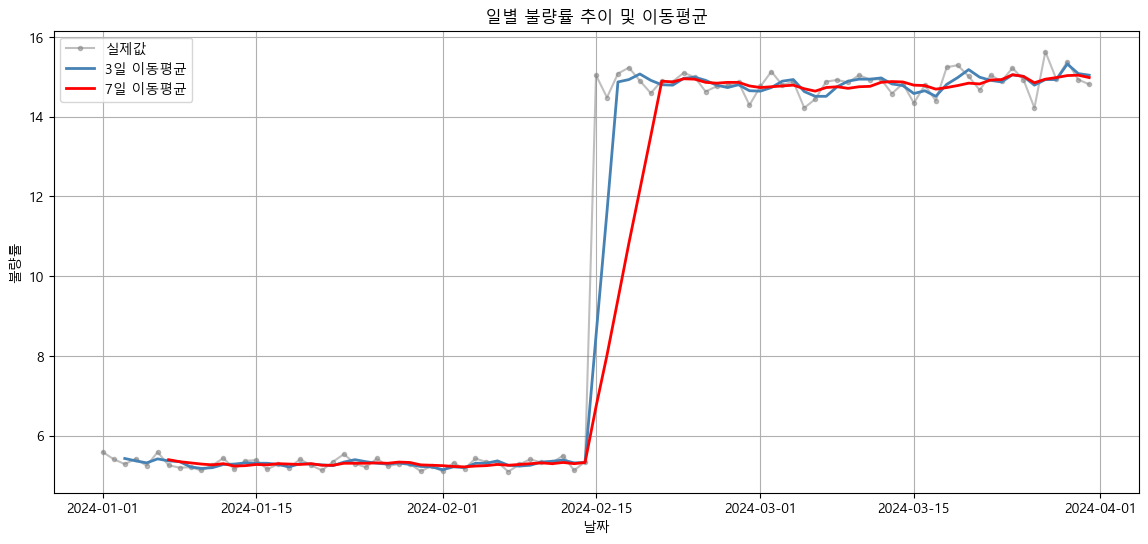

In [142]:
# 7. Figure 크기: (14, 6)
plt.figure(figsize=(14, 6))

# 4. 한 차트에 3개 선 그래프 표시:
#    - 실제값: 회색, alpha=0.5, 마커='o', markersize=3, label='실제값'
#    - 3일 MA: 'steelblue', linewidth=2, label='3일 이동평균'
#    - 7일 MA: 'red', linewidth=2, label='7일 이동평균'
plt.plot(daily_dft_rate.index, daily_dft_rate.values, color='gray', alpha=0.5, marker='o', markersize=3, label='실제값')
plt.plot(daily_dft_rate.index, daily_dft_rate_3MA.values, color='steelblue', linewidth=2, label='3일 이동평균')
plt.plot(daily_dft_rate.index, daily_dft_rate_7MA.values, color='red', linewidth=2, label='7일 이동평균')

# 5. 제목: '일별 불량률 추이 및 이동평균'
plt.title('일별 불량률 추이 및 이동평균')
plt.xlabel('날짜')
plt.ylabel('불량률')
# 6. 범례, 격자 추가
plt.legend()
plt.grid()

plt.show()

---
## 문제 5: 센서 데이터 시계열 (4개 subplot) (10점)

**요구사항**:
1. 센서 데이터에서 첫 번째 설비의 첫 날 데이터 추출
2. 4x1 subplot 구성 (세로로 쌓기, sharex=True):
   - [0]: 온도 (색상: 'red', 제목: 'Temperature')
   - [1]: 압력 (색상: 'blue', 제목: 'Pressure')
   - [2]: 진동 (색상: 'green', 제목: 'Vibration')
   - [3]: 전류 (색상: 'orange', 제목: 'Current')
3. 모든 subplot에 격자 추가
4. 전체 제목: '설비 센서 데이터 시계열'
5. Figure 크기: (14, 10)

**힌트**: `plt.subplots(4, 1, sharex=True)`

In [143]:
# 1. 센서 데이터에서 첫 번째 설비의 첫 날 데이터 추출
end_date = sensor_df.loc[0, 'measurement_time'] + pd.Timedelta(days=1)
eq1_day1 = sensor_df[(sensor_df['equipment_id'] == sensor_df.loc[0, 'equipment_id']) & (sensor_df['measurement_time'] < end_date)]
eq1_day1.set_index('measurement_time', inplace=True)
eq1_day1

,sensor_id,equipment_id,temperature,pressure,vibration,current,voltage,rpm,created_at
measurement_time,,,,,,,,,
2024-01-01 00:00:00,1,INJ-001,183.93,148.65,2.6838,48.05,218.83,1795.32,2026-01-30 00:45:52
2024-01-01 01:00:00,6,INJ-001,179.26,155.23,2.6619,41.47,221.62,1792.30,2026-01-30 00:45:52
2024-01-01 02:00:00,11,INJ-001,179.78,146.19,2.3795,42.07,221.48,1805.22,2026-01-30 00:45:52
2024-01-01 03:00:00,16,INJ-001,181.30,143.83,2.4134,47.61,211.96,1803.69,2026-01-30 00:45:52
2024-01-01 04:00:00,21,INJ-001,179.96,152.57,2.4701,44.85,215.77,1769.70,2026-01-30 00:45:52
2024-01-01 05:00:00,26,INJ-001,176.14,149.33,2.5944,43.70,230.72,1812.68,2026-01-30 00:45:52
2024-01-01 06:00:00,31,INJ-001,181.93,152.47,2.3188,44.23,220.57,1813.24,2026-01-30 00:45:52
2024-01-01 07:00:00,36,INJ-001,181.88,156.25,2.2091,42.57,225.79,1815.83,2026-01-30 00:45:52
2024-01-01 08:00:00,41,INJ-001,184.31,147.68,2.5049,46.00,227.26,1819.19,2026-01-30 00:45:52


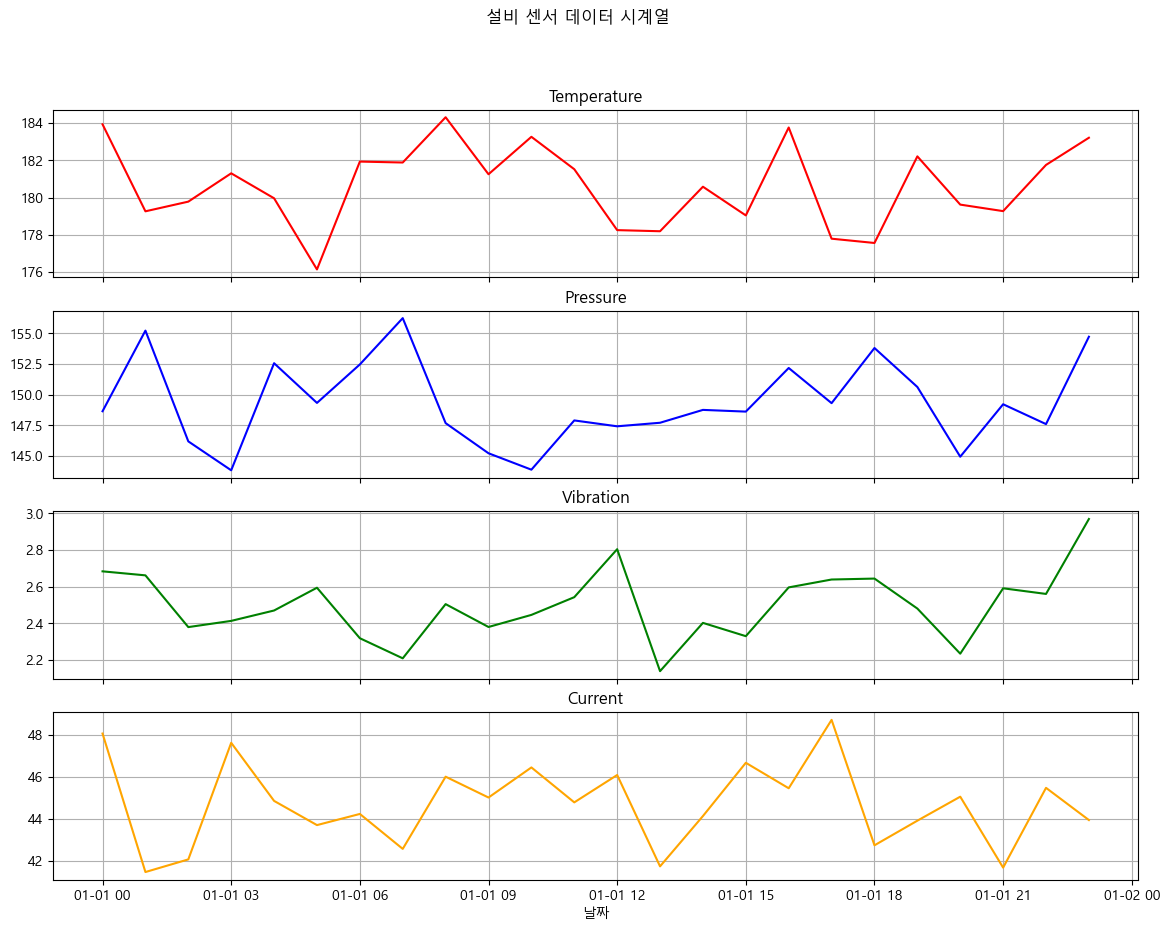

In [144]:
# 2. 4x1 subplot 구성 (세로로 쌓기, sharex=True):
#    - [0]: 온도 (색상: 'red', 제목: 'Temperature')
#    - [1]: 압력 (색상: 'blue', 제목: 'Pressure')
#    - [2]: 진동 (색상: 'green', 제목: 'Vibration')
#    - [3]: 전류 (색상: 'orange', 제목: 'Current')
# 5. Figure 크기: (14, 10)
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(14, 10))

plot_params = (('temperature', 'red'), ('pressure', 'blue'),
               ('vibration', 'green'), ('current', 'orange'))

for idx, ax in enumerate(axs):
    ax.plot(eq1_day1.index, eq1_day1[plot_params[idx][0]], color=plot_params[idx][1])
    ax.set_title(plot_params[idx][0].title())
    # 3. 모든 subplot에 격자 추가
    ax.grid()

# 4. 전체 제목: '설비 센서 데이터 시계열'
plt.suptitle('설비 센서 데이터 시계열')
plt.xlabel('날짜')

plt.show()

---
## 문제 6: 주석과 화살표 - 최대/최소값 표시 (10점)

**요구사항**:
1. 일별 평균 불량률 (처음 30일) 선 그래프
2. 최대값에 주석 추가:
   - 텍스트: '최고 불량률\nX.XX%'
   - 빨간색 화살표
   - 노란색 박스 배경 (alpha=0.7)
3. 평균값 수평선 추가 (빨간 점선)
4. 제목: '일별 불량률 추이 (최대값 강조)'
5. 범례, 격자 추가
6. Figure 크기: (14, 6)

**힌트**: `annotate()`, `axhline()`

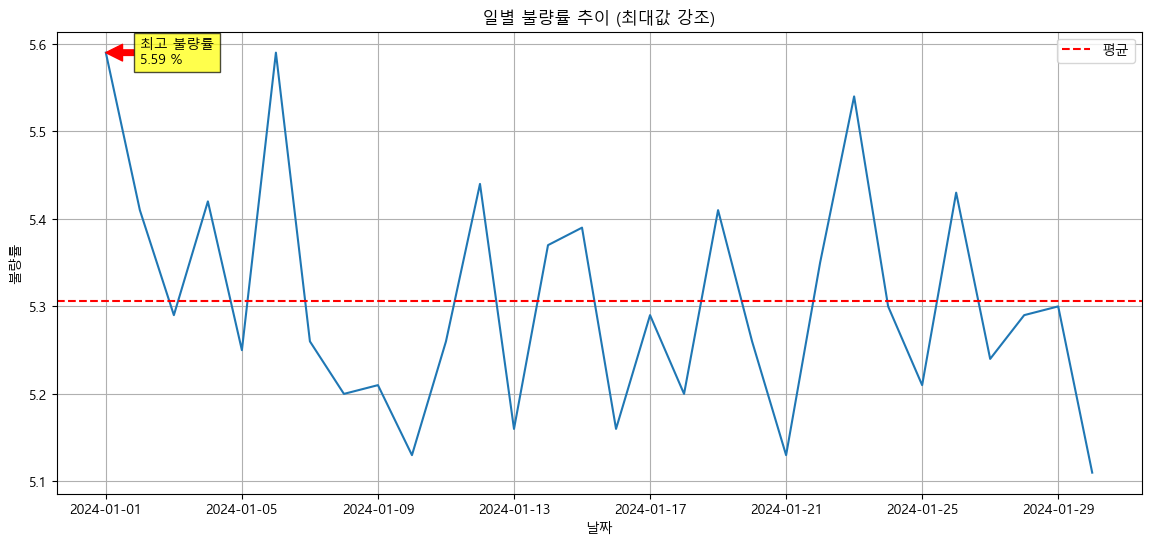

In [145]:
# 6. Figure 크기: (14, 6)
plt.figure(figsize=(14, 6))

# 1. 일별 평균 불량률 (처음 30일) 선 그래프
daily_dft_rate_30 = daily_dft_rate.iloc[:30, ].copy()
plt.plot(daily_dft_rate_30.index, daily_dft_rate_30.values)

# 2. 최대값에 주석 추가:
#    - 텍스트: '최고 불량률\nX.XX%'
#    - 빨간색 화살표
#    - 노란색 박스 배경 (alpha=0.7)
max_idx = daily_dft_rate_30.idxmax()
max_value = daily_dft_rate_30.max()
plt.annotate(f"최고 불량률\n{max_value:.2f} %", xy=(max_idx, max_value),
             xytext=(max_idx + pd.Timedelta(days=1), max_value),
             arrowprops=dict(color='red'),
             bbox=dict(fc='yellow', alpha=0.7), ha='left', va='center')

# 3. 평균값 수평선 추가 (빨간 점선)
plt.axhline(daily_dft_rate_30.mean(), label='평균', color='red', linestyle='--')

# 4. 제목: '일별 불량률 추이 (최대값 강조)'
plt.title('일별 불량률 추이 (최대값 강조)')
plt.xlabel('날짜')
plt.ylabel('불량률')
# 5. 범례, 격자 추가
plt.legend()
plt.grid()

plt.show()


---
## 문제 7: 막대 위 값 표시 - 제품별 생산량 (10점)

**요구사항**:
1. 제품별 총 생산량 막대 그래프
2. 각 막대 위에 생산량 숫자 표시:
   - 천 단위 콤마 포함
   - 가운데 정렬
   - 볼드체
3. 커스텀 색상 사용
4. 막대 테두리: 검은색, linewidth=1.5
5. 제목: '제품별 총 생산량 (수량 표시)'
6. 배경색: '#f9f9f9'
7. Figure 크기: (12, 6)

**힌트**: `for bar in bars:` 반복문, `bar.get_height()`, `ax.text()`

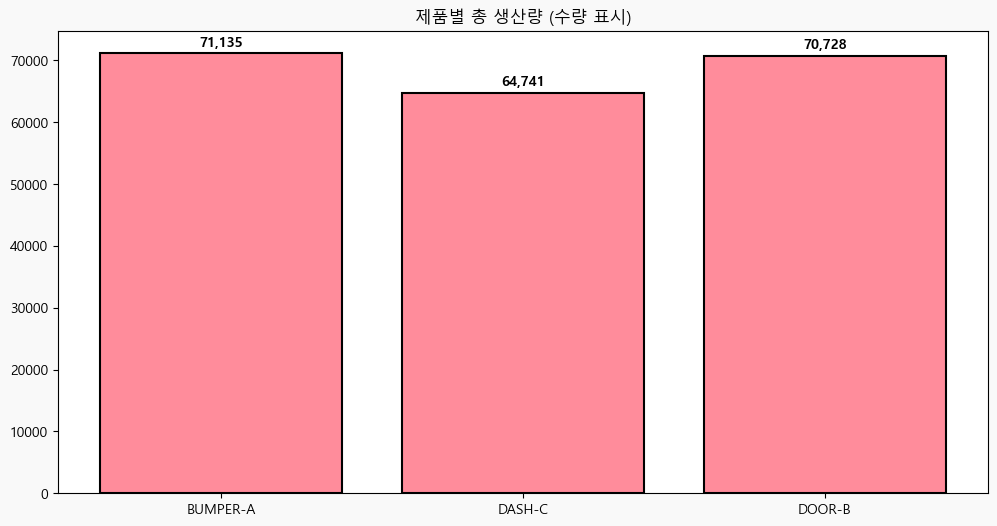

In [146]:
# 6. 배경색: '#f9f9f9'
# 7. Figure 크기: (12, 6)
plt.figure(figsize=(12, 6), facecolor='#f9f9f9')

# 1. 제품별 총 생산량 막대 그래프
# 3. 커스텀 색상 사용
# 4. 막대 테두리: 검은색, linewidth=1.5
bar = plt.bar(prod_qty.index, prod_qty.values,
              color='#FF8C9B', edgecolor='black', linewidth=1.5,)

# 2. 각 막대 위에 생산량 숫자 표시:
#    - 천 단위 콤마 포함
#    - 가운데 정렬
#    - 볼드체
plt.bar_label(bar, labels=[f'{x:,.0f}' for x in prod_qty.values],
              fontweight='bold', padding=3)

# 5. 제목: '제품별 총 생산량 (수량 표시)'
plt.title('제품별 총 생산량 (수량 표시)')

plt.show()

---
## 문제 8: GridSpec 고급 레이아웃 (20점)

**요구사항**:
GridSpec을 사용하여 비대칭 레이아웃의 생산 현황 대시보드 구성

1. **상단 전체 (0, :)**: 일별 생산량 추이 (선 그래프)
   - 처음 30일
   - 색상: 'steelblue', 마커: 'o'
   - 제목: '일별 생산량 추이'

2. **중단 왼쪽 (1, 0)**: 교대조별 생산량 (막대)
   - 색상: ['skyblue', 'coral']
   - 제목: '교대조별 생산량'

3. **중단 오른쪽 (1, 1)**: 제품별 생산량 (막대)
   - 색상: 'lightgreen', 테두리: 'black'
   - 제목: '제품별 생산량'

4. **하단 왼쪽 (2, 0)**: 불량률 분포 (히스토그램)
   - bins=40, 색상: 'skyblue'
   - 평균선 추가 (빨간 점선)
   - 제목: '불량률 분포'

5. **하단 오른쪽 (2, 1)**: 일별 불량률 추이 (선 그래프)
   - 처음 30일
   - 색상: 'red', 마커: 'o'
   - 제목: '일별 불량률 추이'

6. Figure 크기: (16, 12)
7. 전체 제목: '생산 현황 종합 대시보드'
8. hspace=0.3, wspace=0.3

**힌트**: `GridSpec(3, 2)`, `fig.add_subplot(gs[row, col])`

In [147]:
# 여기에 코드 작성


---
## 수고하셨습니다!

### 학습 체크리스트
- [ ] 2x2 Subplot으로 대시보드 구성
- [ ] 이중 y축으로 다른 단위 동시 표시
- [ ] 이중 축 + 막대/선 조합
- [ ] 이동평균 계산 및 시각화
- [ ] 센서 데이터 시계열 (다중 subplot)
- [ ] 주석과 화살표로 특정 값 강조
- [ ] 막대 위에 값 표시
- [ ] GridSpec으로 비대칭 레이아웃

